In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
import os

In [7]:
os.chdir("D:\pandas")

In [8]:
os.listdir()

['areas.csv',
 'canada_per_capita_income.csv',
 'Case Study1- Classify Personal income.ipynb',
 'Data Visualization in Data Science.ipynb',
 'friends.csv',
 'hiring.csv',
 'homeprices.csv',
 'homeprices1.csv',
 'income.csv',
 'Iris_data_sample.csv',
 'Iris_data_sample.txt',
 'Iris_data_sample.xlsx',
 'model_pickle',
 'mtcars.csv',
 'nba.csv',
 'Pandas Tutorial.ipynb',
 'prediction.csv',
 'prediction1.csv',
 'README.md',
 'sample data.csv',
 'student_info.csv',
 'Toyota.csv']

In [9]:
df=pd.read_csv('student_info.csv')

In [87]:
df.head

<bound method NDFrame.head of      study_hours  student_marks
0           6.83          78.50
1           6.56          76.74
2            NaN          78.68
3           5.67          71.82
4           8.67          84.19
..           ...            ...
195         7.53          81.67
196         8.56          84.68
197         8.94          86.75
198         6.60          78.05
199         8.35          83.50

[200 rows x 2 columns]>

In [12]:
df.shape

(200, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [14]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [15]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [16]:
df_studyhours_mean = df.study_hours.mean()

In [17]:
df_studyhours_mean

6.9959487179487185

In [18]:
import math
sh_mean = math.floor(df.study_hours.mean())

In [19]:
sh_mean

6

In [20]:
df1 = df.study_hours.fillna(sh_mean)

In [22]:
df1.head()

0    6.83
1    6.56
2    6.00
3    5.67
4    8.67
Name: study_hours, dtype: float64

In [25]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [26]:
df2 = df.fillna(df.mean())

In [27]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [28]:
from sklearn import linear_model

In [29]:
%matplotlib inline

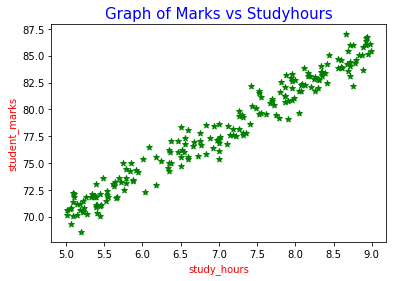

In [48]:
plt.title('Graph of Marks vs Studyhours',size= 15,color = 'b')
plt.xlabel('study_hours',size=10,color='r')
plt.ylabel('student_marks',size =10,color ='r')
plt.scatter(df2.study_hours,df2.student_marks, marker = '*',color = 'g')
plt.show()

In [63]:
x = df2.drop('student_marks',axis='columns')
y = df2.drop('study_hours',axis = 'columns')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 ,random_state = 7)

In [65]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

160
160
40
40


In [49]:
reg = linear_model.LinearRegression()
reg.fit(df2[['study_hours']],df2.student_marks)

LinearRegression()

In [50]:
reg.coef_

array([3.89645241])

In [51]:
reg.intercept_

50.67436878323757

In [54]:
reg.predict([[10]])

array([89.63889285])

In [56]:
reg.predict([[9]])

array([85.74244044])

In [61]:
reg.predict([[12]])

array([97.43179766])

In [67]:
y_predict = reg.predict(x_test)

In [68]:
y_predict

array([73.58550893, 76.07923847, 70.35145344, 84.02800138, 80.0146554 ,
       77.93375   , 83.05388828, 80.63808779, 81.3004847 , 80.75498136,
       73.42965084, 77.93375   , 84.61246924, 71.9100344 , 77.93375   ,
       70.70213415, 71.9100344 , 82.1187397 , 71.09177939, 77.98850015,
       83.48249804, 84.18385948, 76.04027395, 79.15743587, 85.23590163,
       83.20974638, 81.65116541, 85.5086533 , 70.23455986, 73.23482822,
       85.46968877, 71.48142463, 80.67705231, 77.48196134, 84.53454019,
       72.61139583, 75.84545133, 84.222824  , 83.17078185, 71.71521178])

In [72]:
pd.DataFrame(np.c_[x_test,y_test,y_predict],columns = ['Studyhours','Originalmarks','Predictedmarks'])

,Studyhours,Originalmarks,Predictedmarks
0,5.880000,73.40,73.585509
1,6.520000,76.20,76.079238
2,5.050000,70.67,70.351453
3,8.560000,83.88,84.028001
4,7.530000,81.67,80.014655
5,6.995949,78.68,77.933750
6,8.310000,82.69,83.053888
7,7.690000,81.01,80.638088
8,7.860000,81.25,81.300485
9,7.720000,80.43,80.754981


In [73]:
reg.score(x_test,y_test)

0.9741336666035119

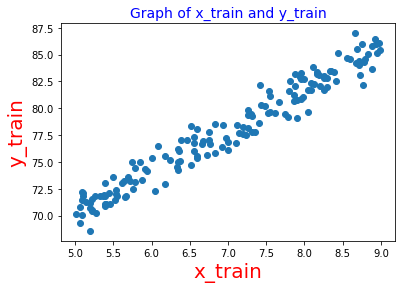

In [78]:
plt.title('Graph of x_train and y_train',size=14, color='b')
plt.xlabel('x_train',size=20, color = 'r')
plt.ylabel('y_train',size =20 , color ='r')
plt.scatter(x_train,y_train)

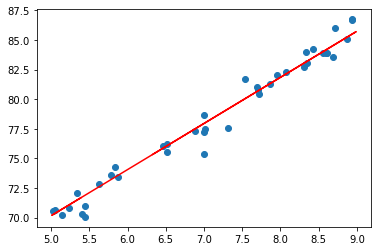

In [81]:
plt.scatter(x_test,y_test)
plt.plot(x_train,reg.predict(x_train),color='r')

In [86]:
reg.predict([[11]])

array([93.53534525])

In [88]:
import joblib
joblib.dump(reg,'studentmarks_predictor')

['studentmarks_predictor']

In [89]:
model = joblib.load('studentmarks_predictor')

In [90]:
model

LinearRegression()

In [95]:
reg.predict([[10]])

array([89.63889285])